In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, RocCurveDisplay, multilabel_confusion_matrix, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
kd = pd.read_csv('/content/kawasaki_disease_dataset.csv')
kd

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,11596,2017-09-26,6,Male,Caucasian,"CityA, StateZ, Country2",25,Fever,Elevated,Normal,Aspirin,Worsening,Myocarditis,Scheduled,Mild
1,37960,2015-01-02,1,Female,Asian,"CityC, StateX, Country2",9,Rash,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
2,81187,2021-07-08,4,Male,African American,"CityB, StateZ, Country2",8,Fever,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
3,52559,2019-11-11,2,Male,African American,"CityA, StateY, Country1",19,Rash,Normal,Normal,Aspirin,Worsening,Coronary Artery Aneurysm,Not Scheduled,Severe
4,88177,2015-12-06,8,Male,African American,"CityB, StateY, Country3",28,Rash,Normal,Normal,Aspirin,Stable,Pericarditis,Scheduled,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,35992,2015-10-10,15,Female,Asian,"CityC, StateX, Country2",23,Red Eyes,Normal,Abnormal,IVIG,Worsening,Pericarditis,Scheduled,Mild
2748,75899,2020-10-30,10,Male,Caucasian,"CityC, StateZ, Country2",26,Fever,Normal,Normal,IVIG + Aspirin,Stable,Myocarditis,Scheduled,Mild
2749,51431,2017-07-19,6,Female,Other,"CityA, StateY, Country1",25,Rash,Normal,Normal,Aspirin,Worsening,NaN,Scheduled,Mild
2750,59023,2020-08-02,15,Male,Hispanic,"CityB, StateY, Country3",21,Swollen Hands/Feet,Elevated,Abnormal,Aspirin,Improvement,Pericarditis,Not Scheduled,Severe


In [ ]:
# Separate features (X) and target (y)
X = kd.drop(['Patient ID', 'Date of Diagnosis', 'Clinical Outcomes'], axis=1)
y = kd['Clinical Outcomes']

# Identify categorical columns in X
categorical_cols = ['Gender', 'Ethnicity', 'Location', 'Symptoms', 'Laboratory Tests', 'Echocardiography', 'Treatment Approach', 'Complications', 'Follow-up Visits', 'Long-Term Effects']

# One-hot encode the categorical features in X
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Encode the target variable 'Clinical Outcomes'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # 20% of the data will be used for testing
                                                    random_state=42 # Set a random state for reproducibility
                                                   )

In [ ]:
print("First 5 rows of X_train after one-hot encoding:")
display(X_train.head())

print("\nData types of X_train columns:")
display(X_train.dtypes)

First 5 rows of X_train after one-hot encoding:


,Age at Diagnosis,Fever Duration,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Other,"Location_CityA, StateX, Country2","Location_CityA, StateX, Country3","Location_CityA, StateY, Country1",...,Symptoms_Swollen Hands/Feet,Symptoms_Swollen Lymph Nodes,Laboratory Tests_Normal,Echocardiography_Normal,Treatment Approach_IVIG,Treatment Approach_IVIG + Aspirin,Complications_Myocarditis,Complications_Pericarditis,Follow-up Visits_Scheduled,Long-Term Effects_Severe
1602,2,18,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,True,True
1784,2,22,True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2599,8,6,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,True,False,False,True
179,9,1,True,True,False,False,False,True,False,False,...,False,True,False,True,False,True,True,False,True,False
1476,10,27,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False



Data types of X_train columns:


,0
Age at Diagnosis,int64
Fever Duration,int64
Gender_Male,bool
Ethnicity_Asian,bool
Ethnicity_Caucasian,bool
Ethnicity_Hispanic,bool
Ethnicity_Other,bool
"Location_CityA, StateX, Country2",bool
"Location_CityA, StateX, Country3",bool
"Location_CityA, StateY, Country1",bool


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #other metrics (distance measure): 'manhattan', 'minkowski', 'chebyshev'
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbors Accuracy: 0.4047186932849365
              precision    recall  f1-score   support

           0       0.36      0.37      0.37       174
           1       0.43      0.41      0.42       190
           2       0.43      0.43      0.43       187

    accuracy                           0.40       551
   macro avg       0.40      0.40      0.40       551
weighted avg       0.41      0.40      0.41       551



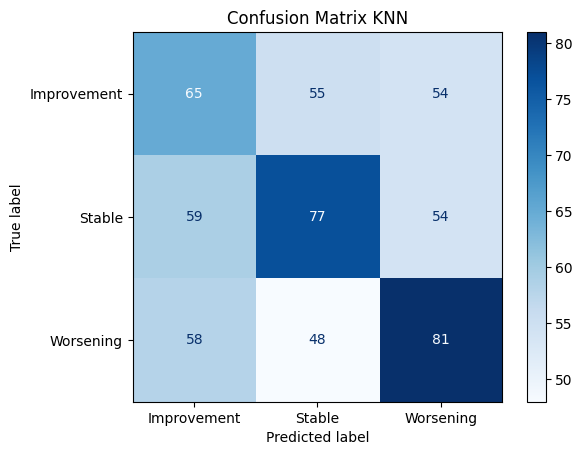

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.33212341197822143
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       174
           1       0.34      0.34      0.34       190
           2       0.35      0.35      0.35       187

    accuracy                           0.33       551
   macro avg       0.33      0.33      0.33       551
weighted avg       0.33      0.33      0.33       551



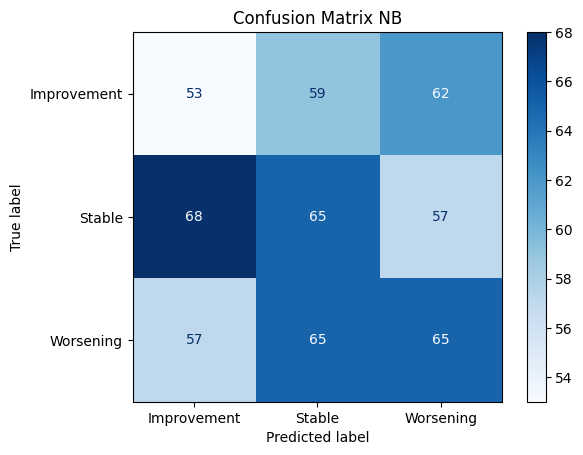

In [ ]:
cm = confusion_matrix(y_test, nb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix NB')
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.35208711433756806
              precision    recall  f1-score   support

           0       0.35      0.29      0.32       174
           1       0.36      0.53      0.43       190
           2       0.33      0.23      0.27       187

    accuracy                           0.35       551
   macro avg       0.35      0.35      0.34       551
weighted avg       0.35      0.35      0.34       551



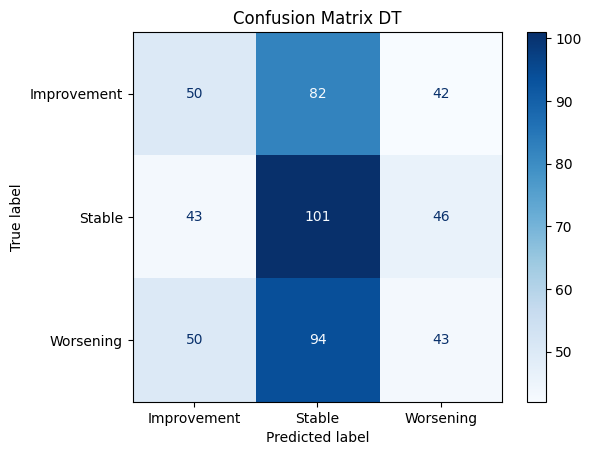

In [ ]:
cm = confusion_matrix(y_test, dt_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix DT')
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_classification = classification_report(y_test, rf_predictions)
print("Random Forest Classification:", rf_classification)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Classification:               precision    recall  f1-score   support

           0       0.33      0.21      0.26       174
           1       0.37      0.44      0.40       190
           2       0.37      0.42      0.40       187

    accuracy                           0.36       551
   macro avg       0.36      0.36      0.35       551
weighted avg       0.36      0.36      0.35       551

Random Forest Accuracy: 0.36116152450090744


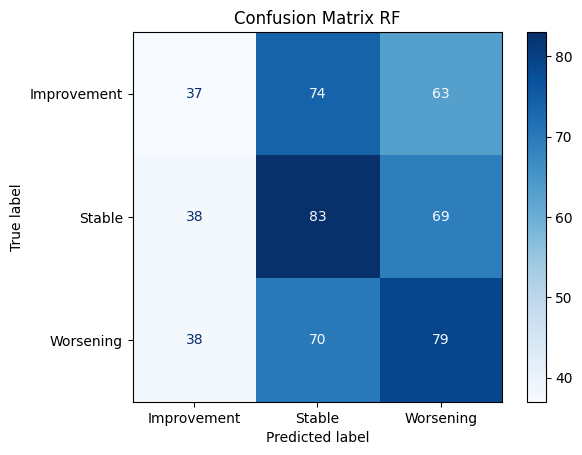

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix RF')
plt.show()

In [ ]:
svm_model = SVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.35571687840290384
              precision    recall  f1-score   support

           0       0.34      0.15      0.21       174
           1       0.35      0.62      0.45       190
           2       0.38      0.28      0.32       187

    accuracy                           0.36       551
   macro avg       0.36      0.35      0.33       551
weighted avg       0.36      0.36      0.33       551



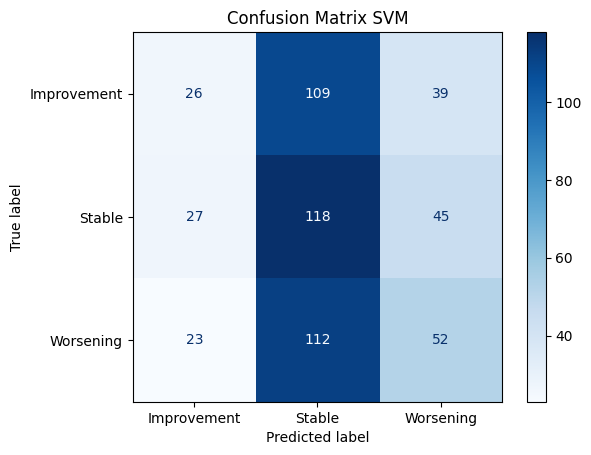

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix SVM')
plt.show()

In [ ]:
svmLinear_model = SVC(kernel='linear', max_iter=1000)
svmLinear_model.fit(X_train, y_train)
svmLinear_predictions = svmLinear_model.predict(X_test)
svmLinear_accuracy = accuracy_score(y_test, svmLinear_predictions)
print("SVM (no kernel) Accuracy:", svmLinear_accuracy)
print(classification_report(y_test, svmLinear_predictions))

SVM (no kernel) Accuracy: 0.3139745916515426
              precision    recall  f1-score   support

           0       0.28      0.34      0.31       174
           1       0.33      0.31      0.32       190
           2       0.34      0.29      0.31       187

    accuracy                           0.31       551
   macro avg       0.32      0.31      0.31       551
weighted avg       0.32      0.31      0.31       551



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


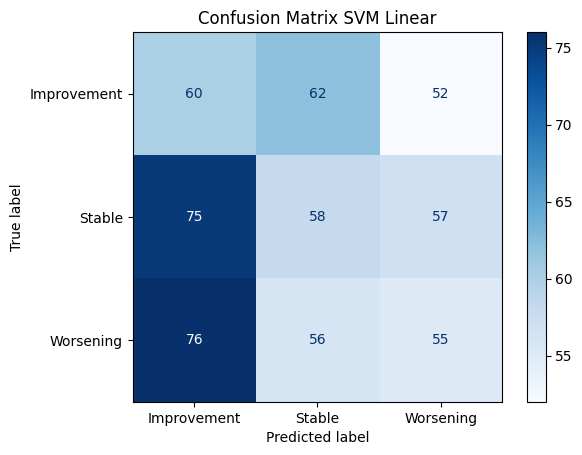

In [ ]:
cm = confusion_matrix(y_test, svmLinear_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Improvement', 'Stable', 'Worsening'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix SVM Linear')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score

In [ ]:
# Define cross-validation technique
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models and parameters
knn = KNeighborsClassifier()
dTree = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
NB = GaussianNB()
SVM = SVC(random_state=42)
SVM_linear = SVC(kernel='linear', random_state=42)

# set models in a dictionary
models = [
    knn,
    dTree,
    RF,
    NB,
    SVM,
    SVM_linear
]

In [ ]:
# scoring model
score = 'accuracy' # other options: 'precision', 'recall', 'f1'
knn_cv_results = cross_validate(knn, X, y, cv = cv, scoring = score)
dTree_cv_results = cross_validate(dTree, X, y, cv = cv, scoring = score)
RF_cv_results = cross_validate(RF, X, y, cv = cv, scoring = score)
NB_cv_results = cross_validate(NB, X, y, cv = cv, scoring = score)
SVM_cv_results = cross_validate(SVM, X, y, cv = cv, scoring = score)
SVM_linear_cv_results = cross_validate(SVM_linear, X, y, cv = cv, scoring = score)

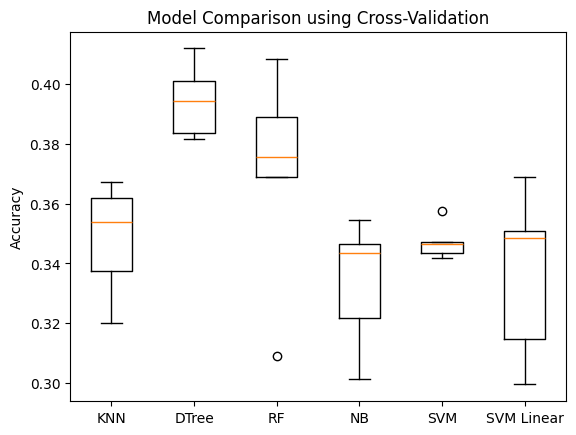

In [ ]:
# get the score results
knn_scores = knn_cv_results['test_score']
dTree_scores = dTree_cv_results['test_score']
RF_scores = RF_cv_results['test_score']
NB_scores = NB_cv_results['test_score']
SVM_scores = SVM_cv_results['test_score']
SVM_linear_scores = SVM_linear_cv_results['test_score']

# visualize the results
models = ['KNN', 'DTree', 'RF', 'NB', 'SVM', 'SVM Linear']
scores = [knn_scores, dTree_scores, RF_scores, NB_scores, SVM_scores, SVM_linear_scores]
plt.boxplot(scores, tick_labels = models)
plt.ylabel('Accuracy')
plt.title('Model Comparison using Cross-Validation')
plt.show()

In [ ]:
# Compare different metrics at once
metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average = 'weighted', zero_division = 0),
    'recall': make_scorer(recall_score, average = 'weighted', zero_division = 0),
    'f1': make_scorer(f1_score, average = 'weighted', zero_division = 0)
}
knn_cv_all_results = cross_validate(knn, X, y, cv = cv, scoring = metrics)
dTree_cv_all_results = cross_validate(dTree, X, y, cv = cv, scoring = metrics)
RF_cv_all_results = cross_validate(RF, X, y, cv = cv, scoring = metrics)
NB_cv_all_results = cross_validate(NB, X, y, cv = cv, scoring = metrics)
SVM_cv_all_results = cross_validate(SVM, X, y, cv = cv, scoring = metrics)
SVM_linear_cv_all_results = cross_validate(SVM_linear, X, y, cv = cv, scoring = metrics)

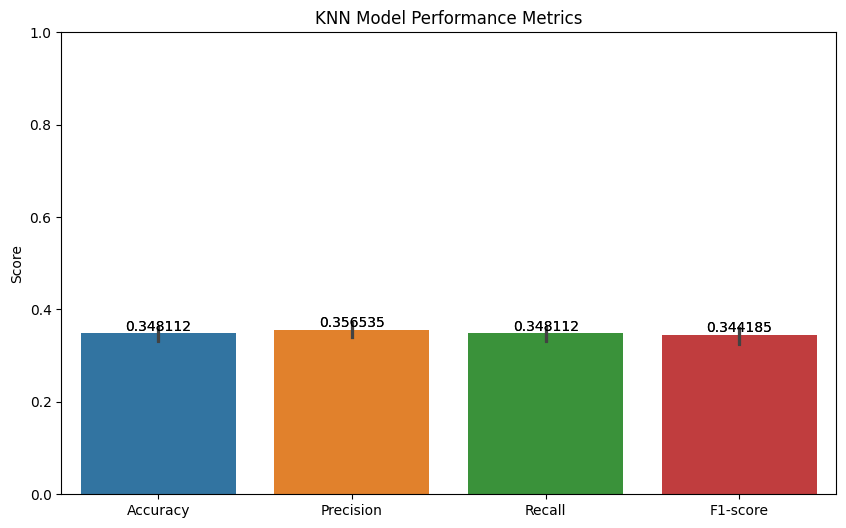

In [ ]:
# Visualize all metrics in knn
KNN_metrics = pd.DataFrame(knn_cv_all_results).filter(like = 'test_')
KNN_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = KNN_metrics)
ax = sns.barplot(data=KNN_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('KNN Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

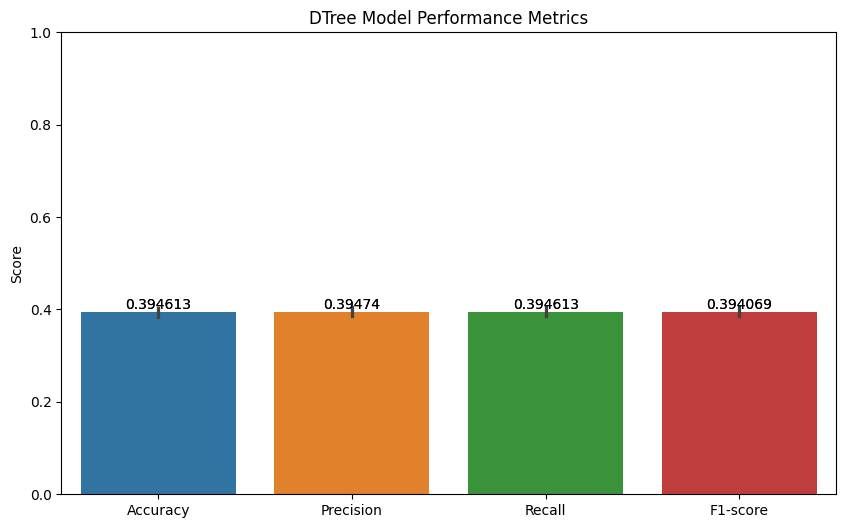

In [ ]:
# Visualize all metrics in dTree
DT_metrics = pd.DataFrame(dTree_cv_all_results).filter(like = 'test_')
DT_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = DT_metrics)
ax = sns.barplot(data = DT_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('DTree Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

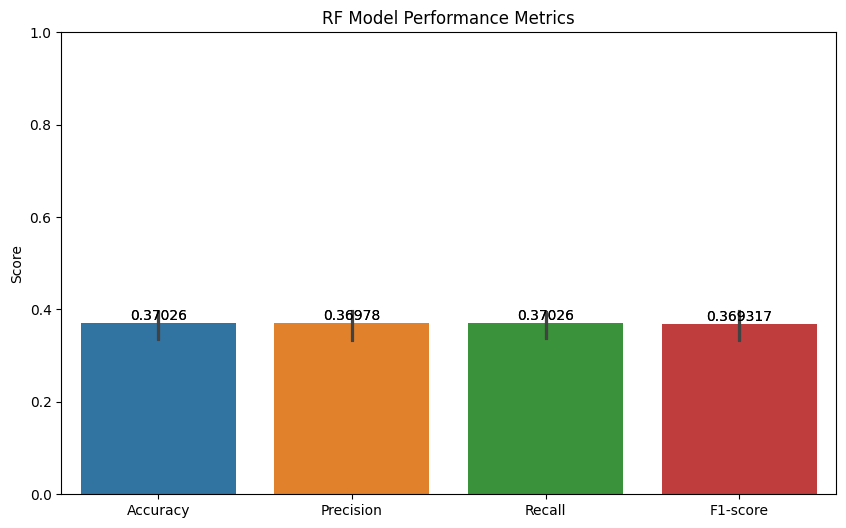

In [ ]:
# Visualize all metrics in RF
RF_metrics = pd.DataFrame(RF_cv_all_results).filter(like = 'test_')
RF_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = RF_metrics)
ax = sns.barplot(data = RF_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('RF Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

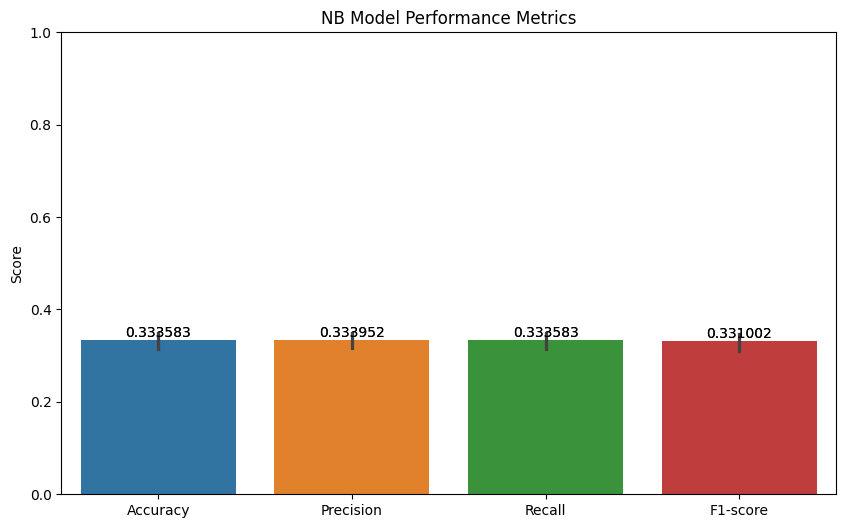

In [ ]:
# Visualize all metrics in NB
NB_metrics = pd.DataFrame(NB_cv_all_results).filter(like = 'test_')
NB_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = NB_metrics)
ax = sns.barplot(data = NB_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('NB Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

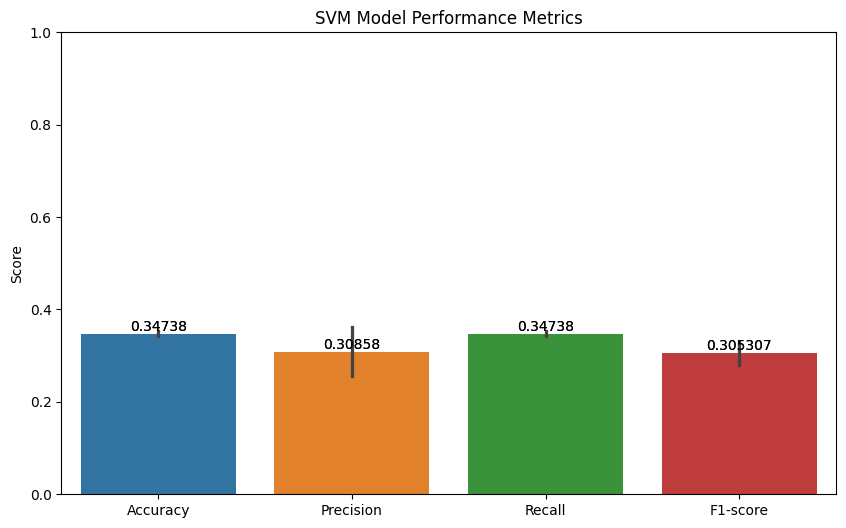

In [ ]:
# Visualize all metrics in SVM
SVM_metrics = pd.DataFrame(SVM_cv_all_results).filter(like = 'test_')
SVM_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = SVM_metrics)
ax = sns.barplot(data = SVM_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('SVM Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

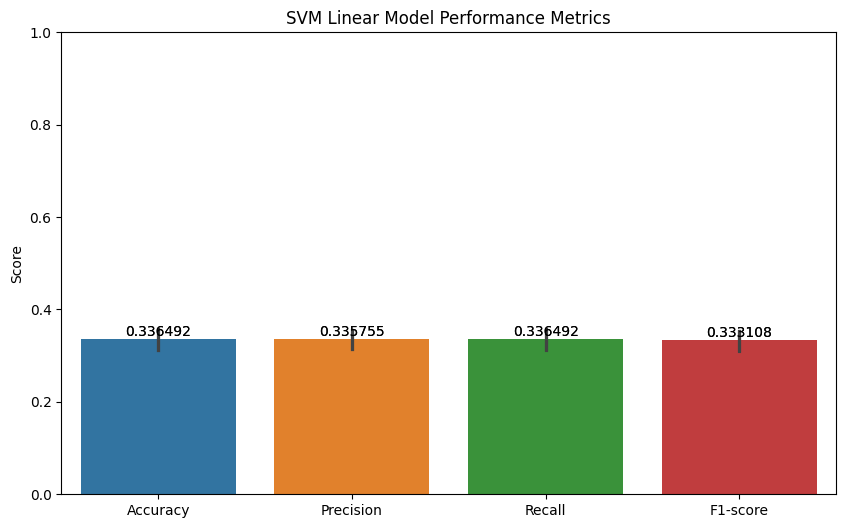

In [ ]:
# Visualize all metrics in SVM Linear
SVM_linear_metrics = pd.DataFrame(SVM_linear_cv_all_results).filter(like = 'test_')
SVM_linear_metrics.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize = (10, 6))
sns.barplot(data = SVM_linear_metrics)
ax = sns.barplot(data = SVM_linear_metrics)
for container in ax.containers: ax.bar_label(container, fontsize=10)
plt.title('SVM Linear Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()